#連接雲端硬碟

In [1]:
# 連接雲端資料夾
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.listdir() # 確認目錄內容

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Arial Unicode MS.ttf',
 'SourceHanSansTW-Regular.otf',
 'TaipeiSansTCBeta-Regular.ttf',
 'dict',
 'data',
 '俄烏.csv',
 'pos_table_俄烏.csv',
 'sentence_table_俄烏.csv',
 'entity_table_俄烏.csv',
 'basic_netWork.html',
 'pers_netWork.html',
 'max_sub.html',
 'lda_zh.html',
 '06-pig_Social_Media.ipynb',
 '03-pig_team_bert.ipynb',
 '05_pig_team_LLM.ipynb',
 '02-pig_team_lda.ipynb',
 'netWork.html',
 '07-pig_graph.ipynb',
 '01-pig_team.ipynb',
 '04-pig_term_ner.ipynb']

In [4]:
# 安裝會使用到的套件
# 安裝ckiptagger前要先安裝tensorflow，有套件相依的問題
# %pip install -U ckiptagger\[tf,gdown\]
# %pip install wordcloud SnowNLP
#!pip install -U ckiptagger\[tf,gdown\]
!pip install ckiptagger==0.2.1
!pip install wordcloud SnowNLP
!pip install tensorflow==2.15.0
!pip install pandas==2.2.2
!pip install matplotlib==3.8.2
#!pip install snownlp==0.12.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 75.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SnowNLP: filename=snownlp-0.12.3-py3-none-any.whl size=37760946 sha256=daf7f464be8a642b4641421e8f0b75359646f73a77e01f7540ba26aeeaa4d6ee
  Stored in directory: /root/.cache/pip/wheels/4a/fc/04/d1937c02b2a445b34754da55f71612a3df648a38d711bd17eb
Successfully built SnowNLP
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

In [3]:
# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
#plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] # MacOS 內建中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # Windows 中文字體

如果有重新裝package，記得需要restart kernel 才會使用更新後的套件

## 2. CKIP安裝

In [4]:
data_utils.download_data_gdown("./")  # 下載ckip model

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=675f8304-45fc-4fff-bc92-dec0cc33bffd
To: /content/drive/MyDrive/Colab Notebooks/data.zip
100%|██████████| 1.88G/1.88G [00:22<00:00, 85.2MB/s]


### 2.1 利用CKIP進行自然語言處理

In [5]:
# 將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

/usr/local/lib/python3.11/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.11/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.11/dist-packages/ckiptagger/model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


## 3. CKIP 標註

### 3.1 將抓取結果用CKIP進行處理
資料來源：
+ 工作流程平台蒐集PTT 八卦版(Gossiping)、政黑版（HatePolitics）文章
+ 關鍵字：「俄烏戰爭」、「烏俄戰爭」
+ 時間： 2022/02/24~2025/05/18
+ 資料筆數：共 12827 篇文章


In [6]:
## 讀取文章
df = pd.read_csv('./俄烏.csv')
df.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1645663423....,[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？,2022-02-24 08:43:41,avexgroup,Gossiping,大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""bumerang"", ""...",101.10.46.162,2022-02-25 00:29:48,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1645664873....,Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？,2022-02-24 09:07:51,BleedWang,Gossiping,怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""kanaptt"", ""c...",180.217.231.165,2022-02-25 00:29:54,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1645677360....,[問卦]共產黨會打共產黨嗎？,2022-02-24 12:35:57,Dubroy,Gossiping,假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ilovemiao"", ...",101.137.223.159,2022-02-25 00:32:24,ptt


定義文字清理的相關function

In [7]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")


    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)

    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)

            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space

            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)

        except:
            return "error"

        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)

    return result

CKIP 處理相關function

In [8]:
# 自定義辭典
with open('./dict/user_dict.txt',encoding="utf-8") as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(2, {'美國': 500.0, '台灣': 500.0, '中國': 500.0, '川普': 500.0, '拜登': 500.0, '歐洲': 500.0, '戰爭': 500.0, '德國': 500.0, '飛彈': 500.0, '轟炸': 500.0, '士兵': 500.0}), (3, {'侯友宜': 500.0, '賴清德': 500.0, '俄羅斯': 500.0, '烏克蘭': 500.0, '無人機': 500.0}), (4, {'俄烏戰爭': 500.0, '烏俄戰爭': 500.0, '澤倫斯基': 500.0, '援助計劃': 500.0})]


In [9]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos])
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]])
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []

    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level
    # print(f"\ndocument {index}")

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(str(row['artContent']))
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)

    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat,
                    columns=['system_id','word','pos'])

    entity_table = pd.DataFrame(data=entity_flat,
                        columns=['system_id','word','ner'])

    sentence_table = pd.DataFrame(data=sentence_list,
                    columns=['system_id','sentence'])

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [10]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0])
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['大家好'], ['烏克蘭俄羅斯戰爭觸即發'], ['中華民國台灣向很熱心想積極參與國際事務'], ['軍力排名也是全球第維基百科資料'], ['和不趁現這個機會練練手']]
['大家好', '烏克蘭俄羅斯戰爭觸即發', '中華民國台灣向很熱心想積極參與國際事務', '軍力排名也是全球第維基百科資料', '和不趁現這個機會練練手']


In [11]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 6955.7422206401825


+ 欄位名稱介紹
    + pos_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + pos : part-of-speech,詞性
    + entity_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + ner: 命名實體
    + sentence_table 欄位:
        + system_id : ptt 貼文id
        + text: 原始斷句

In [12]:
pos_table.head() # word pos 列表

,system_id,word,pos
0,1,大家,Nh
1,1,好,VH
2,1,烏克蘭,Nc
3,1,俄羅斯,Nc
4,1,戰爭,Na


In [13]:
entity_table.head() # word entity 列表

,system_id,word,ner
0,1,烏克蘭俄羅斯戰爭,EVENT
1,1,中華民國,GPE
2,1,台灣,GPE
3,1,第維基,NORP
4,1,台灣,NORP


In [14]:
sentence_table.head()

,system_id,sentence
0,1,大家好
1,1,烏克蘭俄羅斯戰爭觸即發
2,1,中華民國台灣向很熱心想積極參與國際事務
3,1,軍力排名也是全球第維基百科資料
4,1,和不趁現這個機會練練手


In [15]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

total posts numbers: 7186
posts have NER: 7186


In [16]:
# 將文章存成csv
pos_table.to_csv('./pos_table_俄烏.csv', index = False)
entity_table.to_csv('./entity_table_俄烏.csv', index = False)
sentence_table.to_csv('./sentence_table_俄烏.csv', index = False)

### 3.2 探索分析 - NER

將剛才分析的資料匯入

In [17]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("./pos_table_俄烏.csv")
entity_table = pd.read_csv("./entity_table_俄烏.csv")
sentence_table = pd.read_csv("./sentence_table_俄烏.csv")

### NER 種類分析
查看標註這個文集後辨識出哪一些實體種類<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [18]:
entity_table['ner'].unique()

array(['EVENT', 'GPE', 'NORP', 'ORG', 'PERSON', 'LOC', 'CARDINAL', 'FAC',
       'DATE', 'ORDINAL', 'TIME', 'WORK_OF_ART', 'MONEY', 'LANGUAGE',
       'QUANTITY', 'LAW', 'PRODUCT', 'PERCENT'], dtype=object)

In [19]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

,ner,count
4,GPE,242295
11,ORG,95844
13,PERSON,94448
1,DATE,42713
0,CARDINAL,18125
2,EVENT,17744
7,LOC,17050
9,NORP,17026
8,MONEY,5933
10,ORDINAL,4433


Text(0.5, 0, 'Frequency')

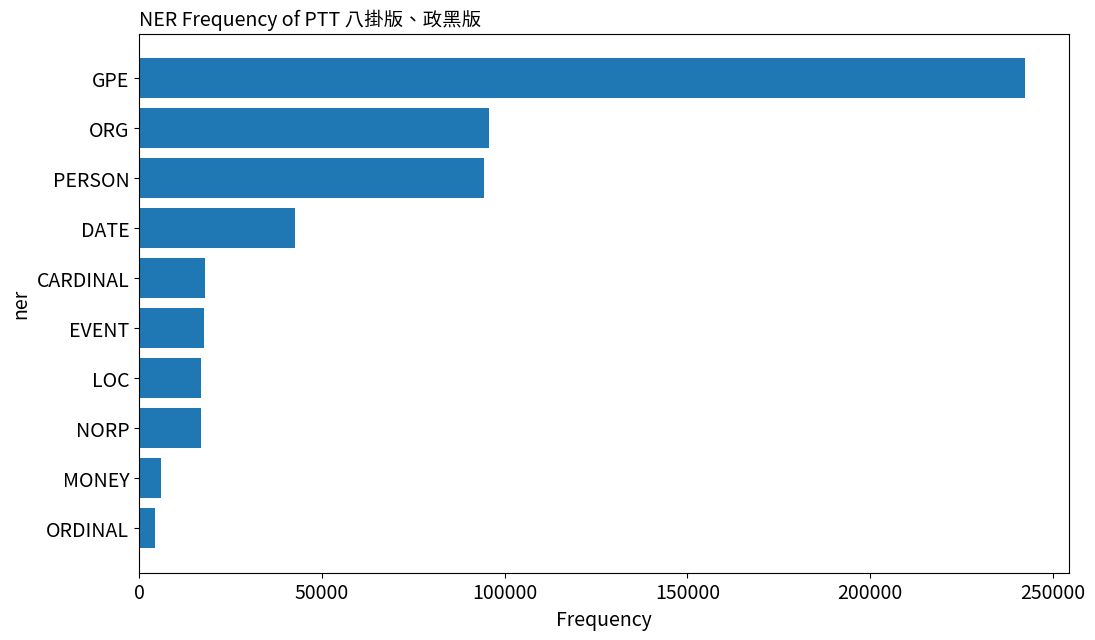

In [20]:
ner = ner_count['ner']
count = ner_count['count']
from matplotlib.font_manager import fontManager
fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['font.size'] = 14
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # Windows 中文字體

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT 八掛版、政黑版',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
# fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

Text(0.5, 0, 'Word Frequency')

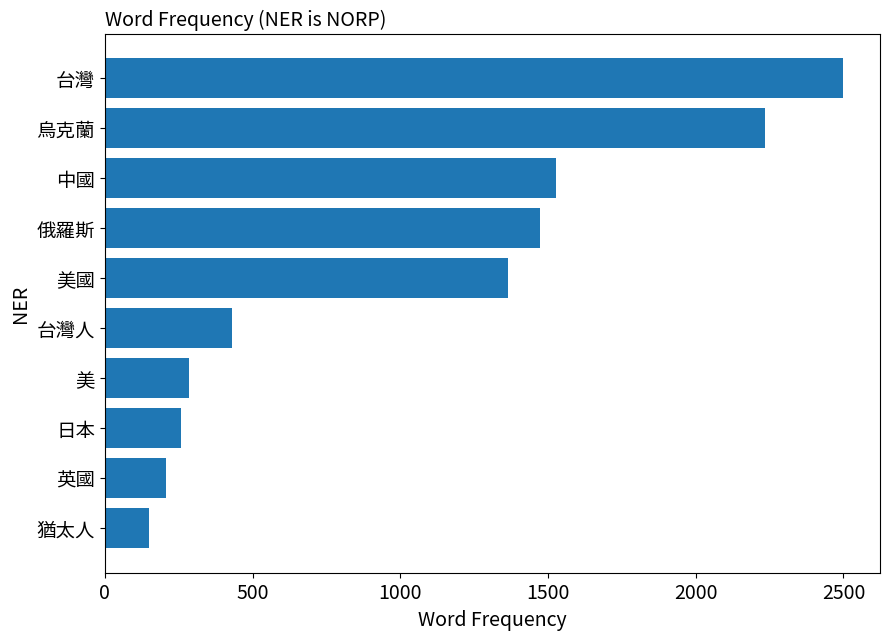

In [21]:
# 篩選ner為NORP的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

可以看到PTT鄉民討論還是以「台灣」、「烏克蘭」為大宗

### 涉及到的組織(ORG)

Text(0.5, 0, 'Word Frequency')

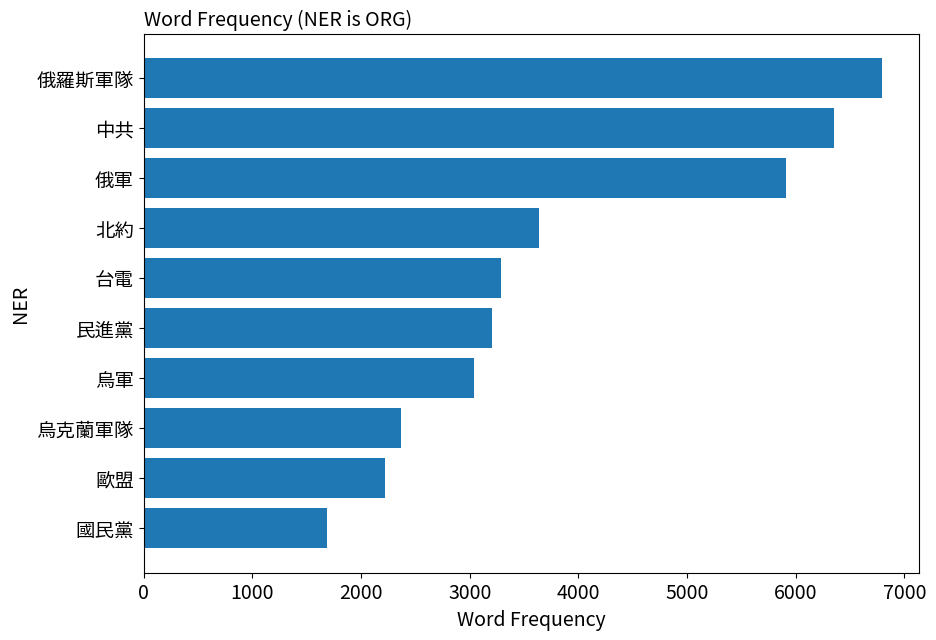

In [22]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

可以看到在多數的討論之中，「俄羅斯軍」是多數會討論的組識。令人好奇的是中共這個詞彙竟然排名第二高。目前名面上中國解放軍並沒有像北韓軍隊這樣正面介入戰爭，頂多對雙方提供民生物資，即使這樣中共這個詞彙依然排名第二高位，推測是PTT討論版在探討如果烏克蘭的情勢套用在中華民國的處境下中共的做法....等。從台電，民進黨字詞也不難看出畢竟PTT是國內的討論版，使用者關心的議題還是俄烏衝突反饋到台灣本土的部分。

### 涉及到的人名(PERSON)

Text(0.5, 0, 'Word Frequency')

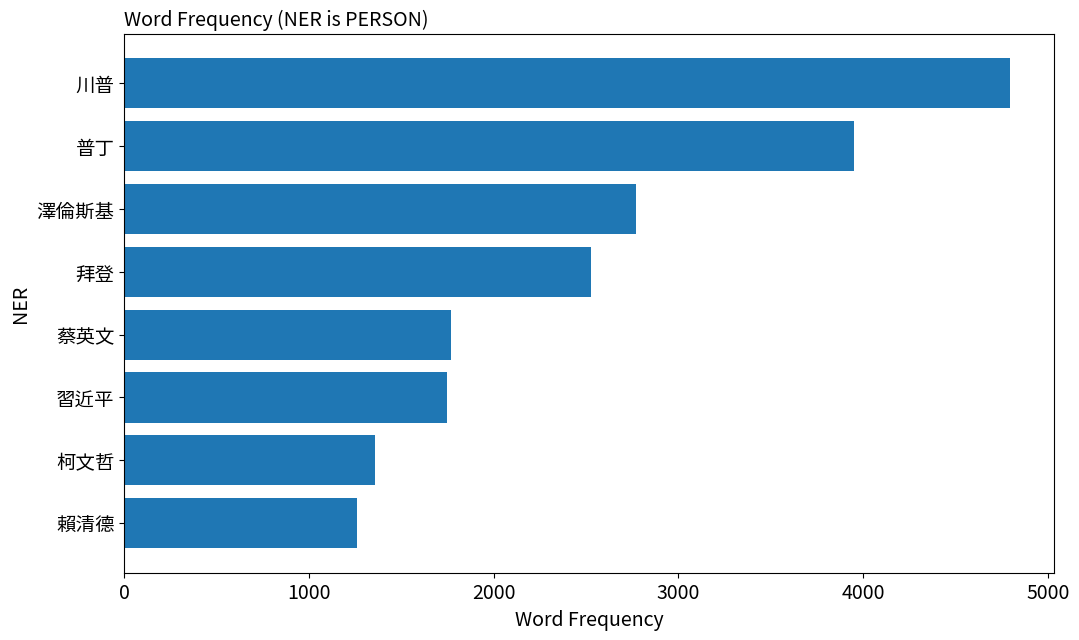

In [23]:
# 篩選ner為PERSON的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

# 下面找出「川普」相關文章，與後續情緒分析一起做探索

In [24]:
keyword_list = ['川普']
Trump = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True,na=False)]
print(f"{' '.join(keyword_list)}：{Trump.shape[0]}篇相關貼文")
Trump.head(3)

川普：1132篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
99,100,https://www.ptt.cc/bbs/Gossiping/M.1645755562....,[問卦]拜登決定不出兵是不是羅斯柴爾德指使的？,2022-02-25 10:19:20,lockgolden,Gossiping,其實從去年拜登倉促從阿富汗撤軍開始，我的感覺就是：這不是拜登自己的意思，而是\n\n背後有一...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""kenbo"", ""cmt...",101.137.211.199,2022-02-26 00:46:20,ptt
170,171,https://www.ptt.cc/bbs/Gossiping/M.1645797125....,[問卦]連烏俄戰爭房價都不會跌了還在奢望崩?,2022-02-25 21:52:03,jis0077,Gossiping,連烏俄戰爭\n英國首相跟川普都直言台灣要小心\n這樣台灣房價還是井噴\n到底還有什麼能讓台灣...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""jokerpok"", ""...",112.105.36.69,2022-02-26 01:01:23,ptt
182,183,https://www.ptt.cc/bbs/Gossiping/M.1645806100....,[問卦]為什麼可以今日香港不行今日烏克蘭,2022-02-26 00:21:38,Ryan1994,Gossiping,前一兩年\n台灣人還在喊今日香港 明日台灣\n嚇得大家台獨意識抬頭\n今天烏俄戰爭 國際上台...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yangzy"", ""cm...",220.142.3.246,2022-02-26 01:04:30,ptt


### 3.3 探索分析 - POS

#### POS 種類分析
查看辨識出哪幾種POS<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [25]:
pos_table['pos'].unique()

array(['Nh', 'VH', 'Nc', 'Na', 'VC', 'D', 'P', 'Dfa', 'VJ', 'VE', 'SHI',
       'DM', 'Nd', 'Nep', 'Nf', 'VL', 'VK', 'DE', 'VF', 'Nes', 'Cbb',
       'VCL', 'Di', 'VI', 'T', 'V_2', 'FW', 'Neqa', 'VA', 'VB', 'VD',
       'Caa', 'Nb', 'Da', 'Ng', 'COMMACATEGORY', 'VHC', 'VG', 'Neu',
       'Ncd', 'I', 'Nv', 'A', 'Dk', 'COLONCATEGORY', 'VAC', 'Cba', 'Cab',
       'Dfb', 'PERIODCATEGORY', 'PARENTHESISCATEGORY', 'Neqb',
       'EXCLAMATIONCATEGORY', 'QUESTIONCATEGORY', 'DASHCATEGORY',
       'PAUSECATEGORY', 'ETCCATEGORY', 'DOTCATEGORY'], dtype=object)

看看除了標點符號，大部分的POS都是哪一類

In [26]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
19,Na,1012031
21,Nc,444244
5,D,429987
41,VC,351409
47,VH,247206
33,P,214677
7,DE,210568
20,Nb,148524
44,VE,148395
4,Cbb,100788


#### POS 常見詞性列表
+ Na: 普通名詞
+ D: 副詞
+ VC: 動作及物動詞
+ Nb: 專有名詞
+ FW: 外文
+ VH: 狀態不及物動詞
+ Nh: 代名詞
+ DE: 的之得地
+ P: 介詞
+ VA: 動作不及物動詞
+ T: 語助詞
+ SHI: 是

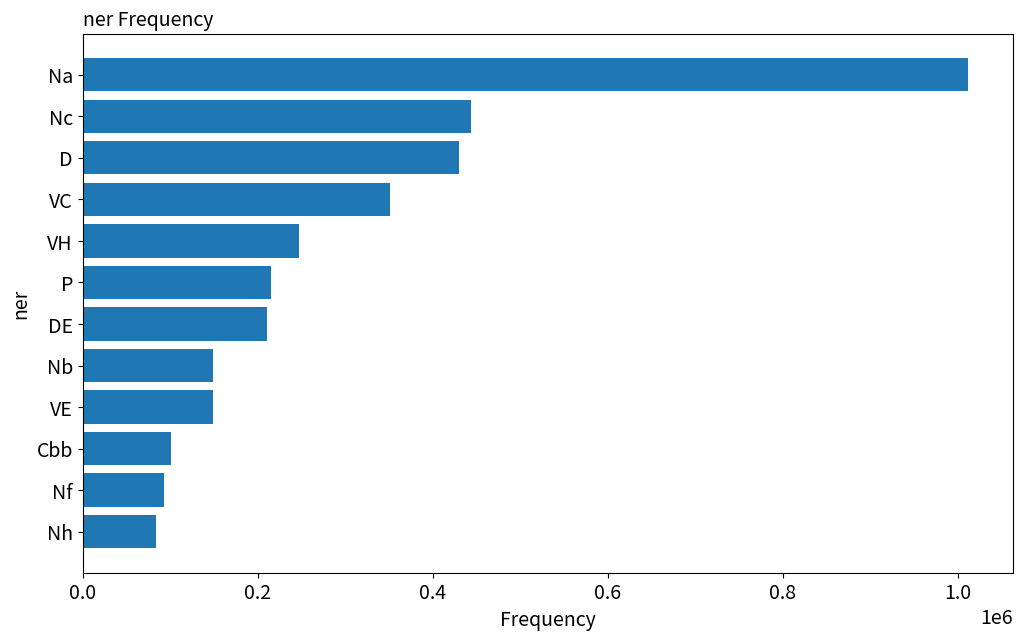

In [27]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的名詞(Noun)
+ 我們可以找出談論烏俄戰爭時大部分討論到的名詞，探索大家的關注焦點。
+ 名詞可以分為「Na: 普通名詞」、「Nb: 專有名詞」等

In [28]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

,word,count
232,中共,6847
5176,川普,5190
11236,烏俄戰爭,4110
1089,俄烏戰爭,4044
7932,普丁,4001
2154,北約,3931
10205,民進黨,3259
11154,澤倫斯基,2895
7137,拜登,2681
10008,歐盟,2530


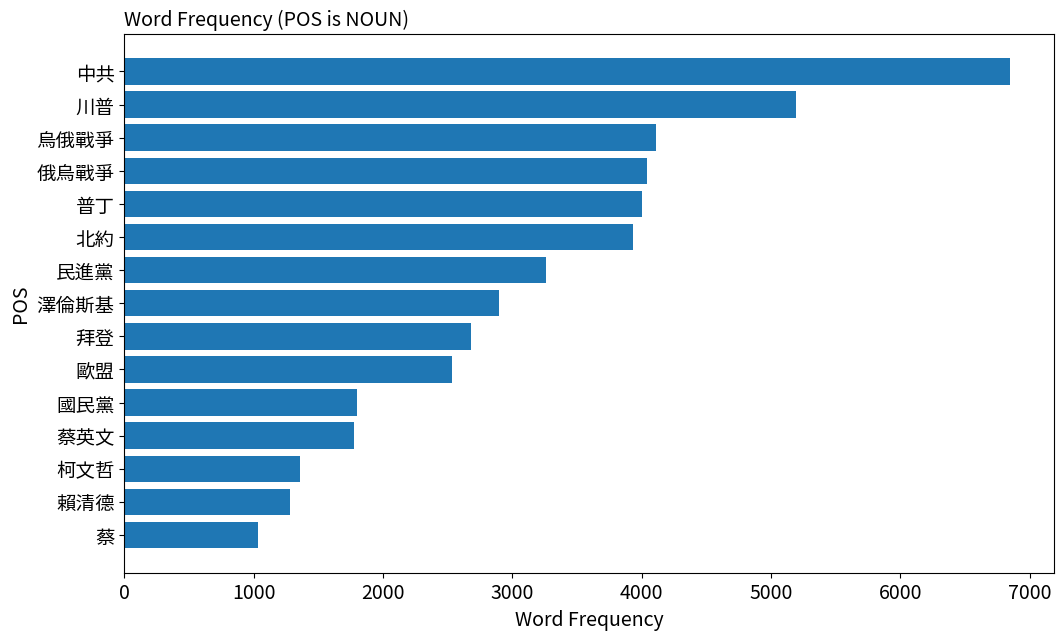

In [29]:
# 設定中文字形
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

可以看到「中共」、「川普」是出現最多次的專有名詞，另外，從「烏俄戰爭」、「普丁」等專有名詞可以推測出大家對於領導人有較高的討論度。

### 涉及到的動詞(VERB)
+ 我們可以找出談論吃到飽時大部分討論到的動詞，探索相關行為。
+ VC: 動作及物動詞、VH: 狀態不及物動詞、VA: 動作不及物動詞

In [30]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

,word,count
9986,進行,6271
5393,支持,5338
9949,連結,4621
385,使用,3501
8781,襲擊,3090
3244,影響,2542
346,佔領,2448
8191,署名,2406
7221,發展,2307
4602,接受,2200


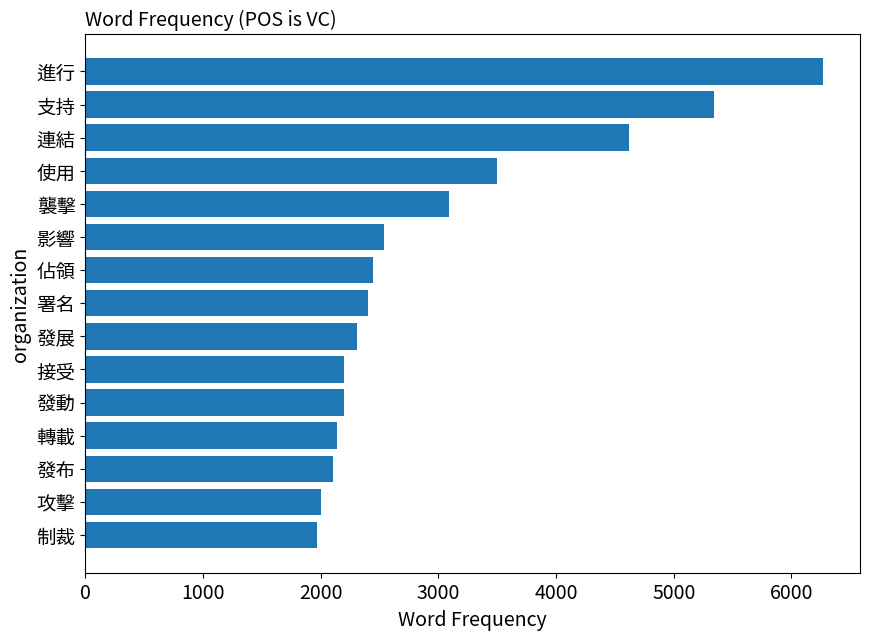

In [31]:
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is VC)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

發現在貼文中的動詞，「進行」佔了相當高的頻率，其他還有出現「支持」、「連結」等詞彙，可推測鄉民對於戰況有較高的重視程度。

## 4. 利用SnowNLP進行情緒分析

+ SnowNLP 針對中文設計，可以提取句子的情緒分類
+ 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
+ 情緒值在 0~1之間，代表負面到正面
+ 官方github: https://github.com/isnowfy/snownlp

In [32]:
from snownlp import SnowNLP
s = SnowNLP('這部電影很讚')
s.sentiments # 範圍在 0~ 1之間 (負面~正面)

0.786074481210413

使用先前NER得到的「川普」相關文章，看看旭集相關文章的情緒表現。<br>
首先將句子和日期合併，方便之後做分析

In [33]:
sentence_table = pd.read_csv("./sentence_table_俄烏.csv") #匯資料

sentiment_date = pd.merge(sentence_table,Trump[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

,system_id,sentence,artDate,dataSource
403,43,媒體來源,2023-01-07 10:53:10,ptt
404,43,記者署名,2023-01-07 10:53:10,ptt
405,43,完整新聞標題,2023-01-07 10:53:10,ptt


In [34]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head(3)

,system_id,sentence,artDate,dataSource,sentimentValue
403,43,媒體來源,2023-01-07 10:53:10,ptt,0.219627
404,43,記者署名,2023-01-07 10:53:10,ptt,0.729795
405,43,完整新聞標題,2023-01-07 10:53:10,ptt,0.072201


In [35]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

,sentimentValue
count,1.064070e+05
mean,4.591950e-01
std,3.381208e-01
min,1.477404e-09
25%,1.357491e-01
50%,4.429698e-01
75%,7.735119e-01
max,1.000000e+00


<Axes: >

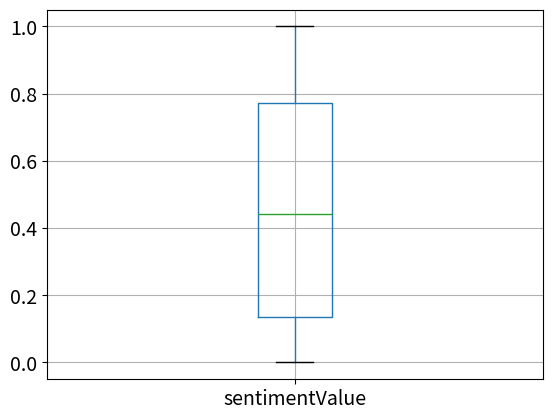

In [36]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

將每個月的情緒分數取平均，並轉換時間格式為年月

In [37]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

,artDate,sentimentValue
0,2022-02,0.461154
1,2022-03,0.467958
2,2022-04,0.506490
3,2022-05,0.436237
4,2022-06,0.444364
5,2022-07,0.467877
6,2022-08,0.447882
7,2022-09,0.427883
8,2022-10,0.487999
9,2022-11,0.473476


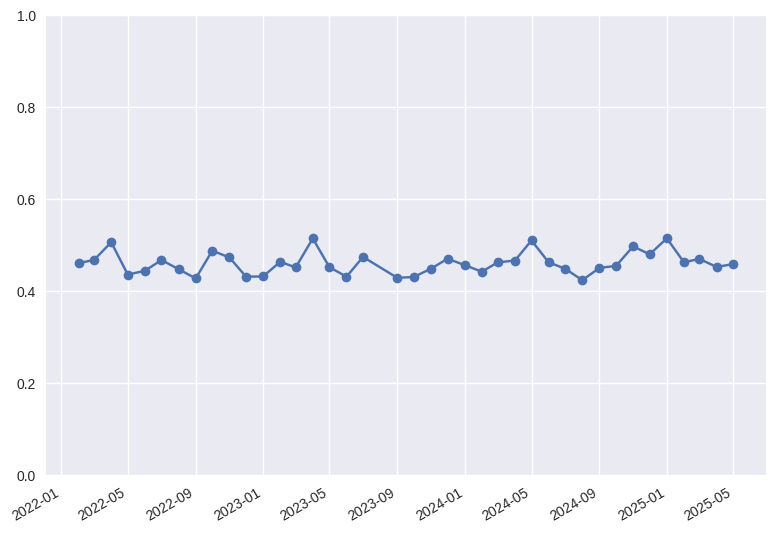

In [38]:
# 平均情緒分數時間趨勢
months = [period.to_timestamp() for period in sentiment_count['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y = sentiment_count['sentimentValue']

plt.style.use('seaborn-v0_8')

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

從上圖中發現大部分天數的情緒值都在0.4~0.5之間，偏向中性，推測是因為PTT八掛版及政黑版有多方面的討論所以會偏向中性。我們挑出 2022年08月 來分析。

### 詞彙探索
從上圖中可以發現 2022年11月 的情緒分數相對高，我們把這個月的正面句子挑出來看看他們都用甚麼詞。

In [39]:
# 篩時間
#filter_sentiment = sent_date[(sent_date['artDate']>='2024-08') & (sent_date['artDate']<='2025-02')]
filter_sentiment = sent_date[(sent_date['artDate']>='2024-08') ]
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.7]

filter_sentiment.head()

,system_id,sentence,artDate,dataSource,sentimentValue
108186,4025,記者署名,2024-08,ptt,0.729795
108191,4025,彭博報導，俄烏戰爭造成能源價格飆升，導致歐洲損失約兆美元約新台幣兆元,2024-08,ptt,0.982839
108194,4025,燃料運輸船舶的搶奪情況加劇,2024-08,ptt,0.727868
108196,4025,洲能源市場仍可能持續吃緊至年,2024-08,ptt,0.906469
108199,4025,業跟消費者抵消大部分衝擊，但,2024-08,ptt,0.879600


In [40]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()

,system_id,sentimentValue,word
0,4025,0.729795,媒體
1,4025,0.729795,來源
2,4025,0.729795,聯合報
3,4025,0.729795,記者
4,4025,0.729795,署名


In [41]:
# 篩選掉只有單個字元的結果
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

### 正面詞彙文字雲

In [42]:
# 自定停用字
with open('dict/stop_words.txt',encoding="utf-8") as f:
    stop_words = f.read().splitlines()

print(stop_words[:20])

[',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '可否', '有無', '再', '本來', '是不是', '一個', '這種']


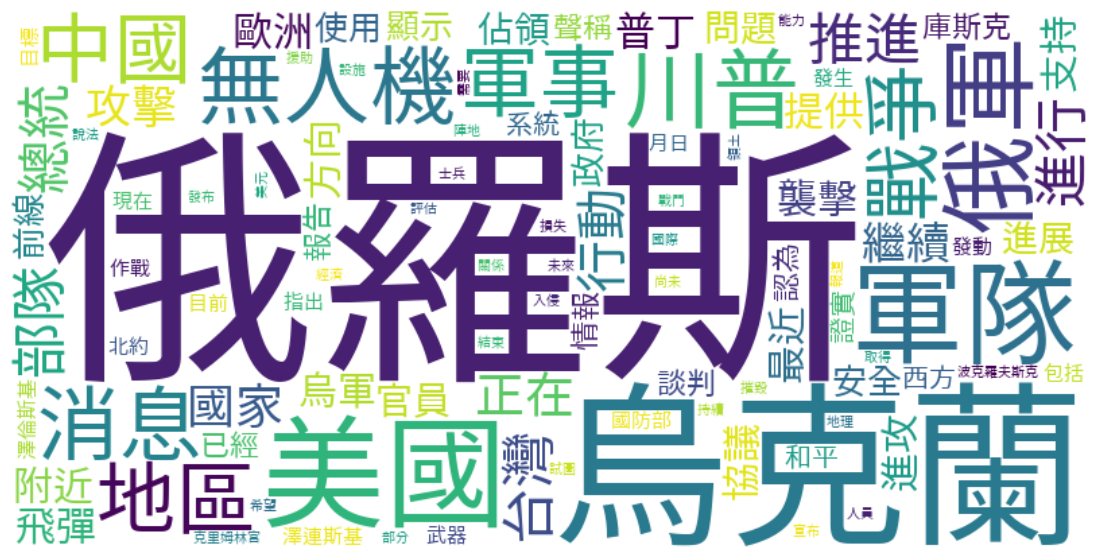

In [43]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('記者','新聞','表示','完整','內文','署名','媒體'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800,
                height = 400,
                max_words=100,
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

藉由「俄羅斯」、「烏克蘭」、「美國」、等詞彙出現在正向文章中，可以知道多數文章對於各國都有有正面的評價